In [71]:
import MeCab
with open("neko.txt",encoding="utf-8") as f:
    nekotxt=f.read()
m = MeCab.Tagger ()
nekoMecab=m.parse (nekotxt)

### 30

In [21]:
import re
pattern=re.compile(r"^(.*?)\t(.*?),(.*?)(?:,.*?){4},(.*?)(?:,.*?)*\n",re.MULTILINE + re.DOTALL)

nekoPattern=pattern.findall(nekoMecab)
nekosets=[]
sentence=[]
for np in nekoPattern:
#     if np[2]=="空白":
#         continue
    term={"surface":np[0],
          "base":np[3],
          "pos":np[1],
          "pos1":np[2],
         }
    sentence.append(term)
    if np[2]=="句点":
        nekosets.append(sentence)
        sentence=[]
for sentence in nekosets[:30]:
    for term in sentence:
        print(term["surface"],end="")
    print()

一　吾輩は猫である。
名前はまだ無い。
　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。
しかしその当時は何という考もなかったから別段恐しいとも思わなかった。
ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。
掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。
この時妙なものだと思った感じが今でも残っている。
第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。
その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。
のみならず顔の真中があまりに突起している。
そうしてその穴の中から時々ぷうぷうと煙を吹く。
どうも咽せぽくて実に弱った。
これが人間の飲む煙草というものである事はようやくこの頃知った。
　この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。
書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。
胸が悪くなる。
到底助からないと思っていると、どさりと音がして眼から火が出た。
それまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。
　ふと気が付いて見ると書生はいない。
たくさんおった兄弟が一疋も見えぬ。
肝心の母親さえ姿を隠してしまった。
その上今までの所とは違って無暗に明るい。
眼を明いていられぬくらいだ。
はてな何でも容子がおかしいと、のそのそ這い出して見ると非常に痛い。
吾輩は藁の上から急に笹原の中へ棄てられたのである。
　ようやくの思いで笹原を這い出すと向うに大きな池がある。


### 31

In [8]:
verb_surface=[]
for sentence in nekosets:
    for term in sentence:
        if term["pos"]=="動詞":
            verb_surface.append(term["surface"])
print(verb_surface[:30])

['生れ', 'つか', 'し', '泣い', 'い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', 'いう', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し']


### 32

In [6]:
verb_base=[]
for sentence in nekosets:
    for term in sentence:
        if term["pos"]=="動詞":
            verb_base.append(term["base"])
print(verb_base[:30])

['生れる', 'つく', 'する', '泣く', 'いる', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', 'いう', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する']


### 33

In [15]:
norn_phrase_no=[]
for sentence in nekosets:
    for i,term in enumerate(sentence):
        if term["surface"]=="の" \
        and term["pos1"]=="連体化"\
        and i >0 and i != len(sentence)-1\
        and sentence[i-1]["pos"]=="名詞" and sentence[i+1]["pos"]=="名詞":
            norn_phrase_no.append(sentence[i-1]["surface"]+sentence[i]["surface"]+sentence[i+1]["surface"])
print(norn_phrase_no[:30])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住']


### 34

In [24]:
norn_connect=[]
for sentence in nekosets:
    size=len(sentence)
    i=0
    while i != size:
        if sentence[i]["pos"]=="名詞" \
            and i != size-1 \
            and sentence[i+1]["pos"]=="名詞":
            conection=[]
            while j != size and sentence[i]["pos"]=="名詞":
                conection.append(sentence[i]["surface"])
                i+=1
            norn_connect.append("".join(conection))
        else: i+=1
print(norn_connect[:30])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', 'こんな片輪', '一度', 'ぷうぷうと煙', '邸内', '三毛', '暖かそう', '書生以外', '再びおさん', '同じ事', '四五遍', 'この間おさん', '三馬', '御台所', 'ら内', 'まま奥', '住家', 'ぎりほとんど', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', 'その後いろいろ経験']


### 35

In [26]:
neko_words={}
for sentence in nekosets:
    for term in sentence:
        if term["base"] in neko_words:
            neko_words[term["base"]]+=1
        else:
            neko_words[term["base"]]=1
sorted_words=sorted(neko_words.items(),key=lambda x:x[1],reverse=True)
print(sorted_words[:30])

[('の', 9198), ('。', 7486), ('て', 6777), ('、', 6772), ('は', 6418), ('に', 6177), ('を', 6047), ('だ', 5967), ('と', 5486), ('が', 5338), ('た', 4250), ('する', 3661), ('「', 3231), ('」', 3225), ('ない', 3058), ('も', 2433), ('ある', 2309), ('で', 2092), ('から', 2022), ('*', 1887), ('いる', 1723), ('か', 1552), ('ん', 1521), ('云う', 1411), ('事', 1205), ('です', 1166), ('ます', 1158), ('なる', 1141), ('へ', 1034), ('う', 980)]


### 36

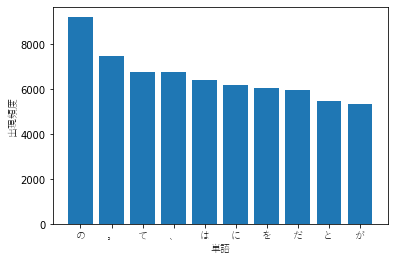

In [78]:
# coding:utf-8
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font = fm.FontProperties(fname="C:\Windows\Fonts\YuGothL.ttc")
top_10=list(zip(*sorted_words[:10]))
plt.bar(range(10),top_10[1])
plt.xticks(range(10),top_10[0],fontproperties=font)
plt.xlabel("単語",fontproperties=font)
plt.ylabel("出現頻度",fontproperties=font)
plt.show()

### 37

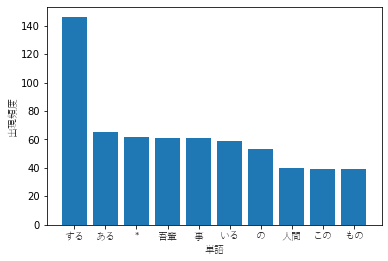

In [77]:
from collections import defaultdict
neko_freq=defaultdict(int)
for sentence in nekosets:
    if "猫" in [morph["base"] for morph in sentence]:
        for morph in sentence:
            if morph["pos"] not in ["記号", "助詞", "助動詞"]:
                neko_freq[morph["base"]] +=1
del neko_freq['猫']
neko_freq_sorted=sorted(neko_freq.items(), key=lambda x: x[1], reverse=True)
top_10=list(zip(*neko_freq_sorted[:10]))
plt.bar(range(10),top_10[1])
plt.xticks(range(10),top_10[0],fontproperties=font)
plt.xlabel("単語",fontproperties=font)
plt.ylabel("出現頻度",fontproperties=font)
plt.show()

### 38

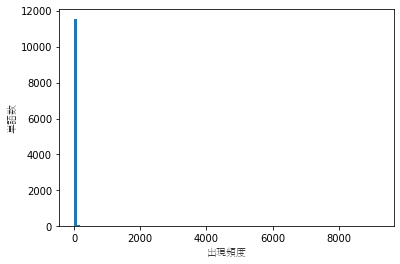

In [76]:
from collections import defaultdict
appearence=defaultdict(int)
for sentence in nekosets:
    for morph in sentence:
        appearence[morph["base"]]+=1
plt.hist(appearence.values(), bins=100)
plt.xlabel("出現頻度",fontproperties=font)
plt.ylabel("単語数",fontproperties=font)
plt.show()

### 39

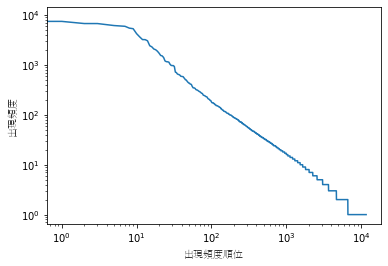

In [84]:
plt.plot(sorted(appearence.values(),reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現頻度順位",fontproperties=font)
plt.ylabel("出現頻度",fontproperties=font)
plt.show()